# LUCAS Samples
First of all, let's import `eumap` library.

In [1]:
# To work with local eumap code
import sys
sys.path.append('../../')

from eumap.datasets.lucas import LucasRequest, LucasIO

## Usage

### 1. Define request

Request is defined by `LucasRequest` object. Bbox filter can be enabled by `bbox` property. Currently only [EPSG:3035](http://epsg.io/3035) is supported.

For testing purpose a request can be created by `build()` method.

In [2]:
request = LucasRequest()
request.bbox = (4504276, 3020369, 4689608, 3105290)

request.build()

{'typename': 'lucas:lucas_points',
 'filter': '<ogc:BBOX xmlns:ogc="http://www.opengis.net/ogc"><ogc:PropertyName>geom</ogc:PropertyName><gml311:Envelope xmlns:gml311="http://www.opengis.net/gml" srsName="http://www.opengis.net/gml/srs/epsg.xml#3035"><gml311:lowerCorner>4504276 3020369</gml311:lowerCorner><gml311:upperCorner>4689608 3105290</gml311:upperCorner></gml311:Envelope></ogc:BBOX>'}

### 2. Download data based on request

LUCAS data is controlled by `LucasIO` (input/output) class. Data is downloaded by calling `download()` method based on prepared request. Number of downloaded features can be retrived by `num_of_features()` method.

In [3]:
lucasio = LucasIO()
lucasio.download(request)

print("Number of downloaded points:", lucasio.num_of_features())

2021-12-03 13:48:03,002 - LUCAS - INFO - io.__init__ - Using owslib version 0.22.0
2021-12-03 13:48:03,201 - LUCAS - INFO - io.download - Connected to http://lincalc-02.fsv.cvut.cz/geoserver/wfs
2021-12-03 13:48:03,202 - LUCAS - INFO - io.download - Request: {'srsname': 'http://www.opengis.net/gml/srs/epsg.xml#3035', 'typename': 'lucas:lucas_points', 'filter': '<ogc:BBOX xmlns:ogc="http://www.opengis.net/ogc"><ogc:PropertyName>geom</ogc:PropertyName><gml311:Envelope xmlns:gml311="http://www.opengis.net/gml" srsName="http://www.opengis.net/gml/srs/epsg.xml#3035"><gml311:lowerCorner>4504276 3020369</gml311:lowerCorner><gml311:upperCorner>4689608 3105290</gml311:upperCorner></gml311:Envelope></ogc:BBOX>'}
2021-12-03 13:48:04,836 - LUCAS - INFO - io.download - Download process successfuly finished. Size of downloaded data: 13839kb
Number of downloaded points: 5219


### 3. Get data in specified format

`LucasIO` object allows getting data in various data structures/formats.

By calling `to_geopandas()` method the data is retrieved as [GeoDataFrame](https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.html) object.

Method `to_gml()` returns byte array containing data in [OGC GML](https://www.ogc.org/standards/gml) format.

In [4]:
gml_str = lucasio.to_gml()

print(type(gml_str), '\n'.join(gml_str.splitlines()[:5]))

<class 'str'> <?xml version="1.0" encoding="utf-8" ?>
<ogr:FeatureCollection
     xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
     xsi:schemaLocation="http://ogr.maptools.org/ eumap_lucas_uyxa7dkt.xsd"
     xmlns:ogr="http://ogr.maptools.org/"


Warning 1: Several drivers matching gml extension. Using GML


Method `to_gpkg()` stores data into [OGC GeoPackage](https://www.geopackage.org/) file.

In [5]:
gpkg_file = 'sample.gpkg'
lucasio.to_gpkg(gpkg_file)

from pathlib import Path
print(Path(gpkg_file).exists())

True


## Request examples

Beside filtering by *bbox* `LucasRequest` also supports other methods described below.

### Filter by property

The filter below is equivalent to WHERE condition:

```sql
nuts0 = 'CZ'
```

In [6]:
from owslib.fes import PropertyIsEqualTo, Or

request = LucasRequest() 
request.operator=PropertyIsEqualTo
request.propertyname = 'nuts0'
request.literal = 'CZ'

request.build()

{'typename': 'lucas:lucas_points',
 'filter': '<ogc:PropertyIsEqualTo xmlns:ogc="http://www.opengis.net/ogc"><ogc:PropertyName>nuts0</ogc:PropertyName><ogc:Literal>CZ</ogc:Literal></ogc:PropertyIsEqualTo>'}

#### Logical operators

Logical operator is demostrated in the example below.

```sql
nuts0 = 'CZ' or nuts0 = 'SK'
```

In [7]:
from owslib.fes import PropertyIsEqualTo, Or

request = LucasRequest() 
request.operator=PropertyIsEqualTo
request.propertyname = 'nuts0'
request.literal = ['CZ', 'SK']
request.logical = Or

request.build()

{'typename': 'lucas:lucas_points',
 'filter': '<ogc:Or xmlns:ogc="http://www.opengis.net/ogc"><ogc:PropertyIsEqualTo><ogc:PropertyName>nuts0</ogc:PropertyName><ogc:Literal>CZ</ogc:Literal></ogc:PropertyIsEqualTo><ogc:PropertyIsEqualTo><ogc:PropertyName>nuts0</ogc:PropertyName><ogc:Literal>SK</ogc:Literal></ogc:PropertyIsEqualTo></ogc:Or>'}

### Filter by years

This filter is defined by `years` LucasRequest property.

In [8]:
request = LucasRequest()
request.bbox = (4472010, 2838000, 4960000, 3112000)
request.years = [2006, 2009]

request.build()

{'typename': 'lucas:lucas_points',
 'filter': '<ogc:And xmlns:ogc="http://www.opengis.net/ogc"><ogc:BBOX><ogc:PropertyName>geom</ogc:PropertyName><gml311:Envelope xmlns:gml311="http://www.opengis.net/gml"><gml311:lowerCorner>4472010 2838000</gml311:lowerCorner><gml311:upperCorner>4960000 3112000</gml311:upperCorner></gml311:Envelope></ogc:BBOX><ogc:Or><ogc:PropertyIsEqualTo><ogc:PropertyName>survey_year</ogc:PropertyName><ogc:Literal>2006</ogc:Literal></ogc:PropertyIsEqualTo><ogc:PropertyIsEqualTo><ogc:PropertyName>survey_year</ogc:PropertyName><ogc:Literal>2009</ogc:Literal></ogc:PropertyIsEqualTo></ogc:Or></ogc:And>'}

Combination of *property* and *year* filter is demonstrated below

```sql
(nuts0 = 'CZ' or nuts0 = 'SK') and (survey_year = 2006 or survey_year = 2009)
```

In [9]:
from owslib.fes import PropertyIsEqualTo, Or

request = LucasRequest() 
request.operator=PropertyIsEqualTo
request.propertyname = 'nuts0'
request.literal = ['CZ', 'SK']
request.logical = Or

request.years = [2006, 2009]

request.build()

{'typename': 'lucas:lucas_points',
 'filter': '<ogc:And xmlns:ogc="http://www.opengis.net/ogc"><ogc:Or><ogc:PropertyIsEqualTo><ogc:PropertyName>nuts0</ogc:PropertyName><ogc:Literal>CZ</ogc:Literal></ogc:PropertyIsEqualTo><ogc:PropertyIsEqualTo><ogc:PropertyName>nuts0</ogc:PropertyName><ogc:Literal>SK</ogc:Literal></ogc:PropertyIsEqualTo></ogc:Or><ogc:Or><ogc:PropertyIsEqualTo><ogc:PropertyName>survey_year</ogc:PropertyName><ogc:Literal>2006</ogc:Literal></ogc:PropertyIsEqualTo><ogc:PropertyIsEqualTo><ogc:PropertyName>survey_year</ogc:PropertyName><ogc:Literal>2009</ogc:Literal></ogc:PropertyIsEqualTo></ogc:Or></ogc:And>'}

### Filter by AOI

Spatial filter can be also defined by polygon vertices. 

There is limit for the request length, so the number of vertices is also limited. Polygon can contain only about 190 vertices.

In [10]:
request = LucasRequest()
request.aoi_polygon = '<Within>' \
                  '     <PropertyName>lucas:geom</PropertyName>' \
                  '     <gml:Polygon xmlns:gml="http://www.opengis.net/gml" srsName="urn:ogc:def:crs:EPSG::3035" gml:id="polygon_32.geom.0">' \
                  '         <gml:exterior>' \
                  '             <gml:LinearRing>' \
                  '                 <gml:posList>3014669.3195414557 4640226.080241454 2981893.140187475 4628385.701013993 2965449.7283930806 4639492.816821902 2958781.6185918115 4658392.1858341275 2977549.274784839 4672892.4477362465 3004572.819247867 4661017.510044226 3014669.3195414557 4640226.080241454 </gml:posList>' \
                  '             </gml:LinearRing>' \
                  '         </gml:exterior>' \
                  '     </gml:Polygon>' \
                  '</Within>'

request.build()

{'typename': 'lucas:lucas_points',
 'filter': '<Within>     <PropertyName>lucas:geom</PropertyName>     <gml:Polygon xmlns:gml="http://www.opengis.net/gml" srsName="urn:ogc:def:crs:EPSG::3035" gml:id="polygon_32.geom.0">         <gml:exterior>             <gml:LinearRing>                 <gml:posList>3014669.3195414557 4640226.080241454 2981893.140187475 4628385.701013993 2965449.7283930806 4639492.816821902 2958781.6185918115 4658392.1858341275 2977549.274784839 4672892.4477362465 3004572.819247867 4661017.510044226 3014669.3195414557 4640226.080241454 </gml:posList>             </gml:LinearRing>         </gml:exterior>     </gml:Polygon></Within>'}

### Groups

Group determines which attributes will describe downloaded data. Tehre are 5 groups (co - Copernicus; fo - Forestry; in - Inspire; lc_lu - Land cover, Land use, lc_lu_so - Land cover, Land use, Soil). 

The file always contains obligatory attributes, which define mainly the location of the point.

Combination of `bbox` and `group` (Land cover, Land use).

In [11]:
request = LucasRequest()
request.bbox = (4504276, 3020369, 4689608, 3105290)
request.group = 'lc_lu'

request.build()

{'typename': 'lucas:lucas_points_lc_lu',
 'filter': '<ogc:BBOX xmlns:ogc="http://www.opengis.net/ogc"><ogc:PropertyName>geom</ogc:PropertyName><gml311:Envelope xmlns:gml311="http://www.opengis.net/gml" srsName="http://www.opengis.net/gml/srs/epsg.xml#3035"><gml311:lowerCorner>4504276 3020369</gml311:lowerCorner><gml311:upperCorner>4689608 3105290</gml311:upperCorner></gml311:Envelope></ogc:BBOX>'}

### Space-time aggregation

Determine whether the data should be space-time aggregated. Space-time aggregation means that one record in the attribute table represents one point with all values measured in all years. On the other hand, when data are not space-time aggregated, every single record in the attribute table represents one survey.

#### With property filter

Combination of property filter and request for space-time aggregated data.

In [12]:
from owslib.fes import PropertyIsEqualTo

request = LucasRequest()
request.operator=PropertyIsEqualTo
request.propertyname = 'nuts0'
request.literal = 'CZ'

request.st_aggregated = True

request.build()

{'typename': 'lucas:lucas_st_points',
 'filter': '<ogc:PropertyIsEqualTo xmlns:ogc="http://www.opengis.net/ogc"><ogc:PropertyName>nuts0</ogc:PropertyName><ogc:Literal>CZ</ogc:Literal></ogc:PropertyIsEqualTo>'}

#### With filter by years and bbox

Combination of filter by `years`, `bbox` and request for `space-time aggregated` data.
Data will be described only by the attributes measured in required years. This means that the attribute table will be smaller and clear.

In [13]:
request = LucasRequest()
request.years = [2015, 2018]

request.bbox=(4624127, 2998330, 4650393, 3013986)

request.st_aggregated = True

request.build()

{'typename': 'lucas:lucas_st_points',
 'filter': '<ogc:And xmlns:ogc="http://www.opengis.net/ogc"><ogc:BBOX><ogc:PropertyName>geom</ogc:PropertyName><gml311:Envelope xmlns:gml311="http://www.opengis.net/gml"><gml311:lowerCorner>4624127 2998330</gml311:lowerCorner><gml311:upperCorner>4650393 3013986</gml311:upperCorner></gml311:Envelope></ogc:BBOX><ogc:Or><ogc:Not><ogc:PropertyIsNull><ogc:PropertyName>survey_date_2015</ogc:PropertyName></ogc:PropertyIsNull></ogc:Not><ogc:Not><ogc:PropertyIsNull><ogc:PropertyName>survey_date_2018</ogc:PropertyName></ogc:PropertyIsNull></ogc:Not></ogc:Or></ogc:And>'}

### Show photos of selected LUCAS point

#### Show point_id of points by geopandas

In [14]:
df = lucasio.to_geopandas()
df[["point_id"]]

2021-12-03 13:48:34,648 - fiona.ogrext - INFO - collection.crs - Failed to auto identify EPSG: 7


,point_id
0,46583040
1,45303070
2,45323070
3,45583070
4,46003052
...,...
5214,45643068
5215,46563076
5216,46243040
5217,45123100


#### Display photos

Show photos of selected LUCAS point by calling the method `get_images()` with parameters `year` and `point_id` of the point. This will return the dictionary of URL adresses of 5 photos representing the Point and the North, the South, the East and the West of the point. 

In [15]:
id = df[["point_id"]].values[0][0]
images = lucasio.get_images(2018, id)
print(images)

{'P': 'https://gisco-services.ec.europa.eu/lucas/photos/2018/CZ/465/830/46583040P.jpg', 'S': 'https://gisco-services.ec.europa.eu/lucas/photos/2018/CZ/465/830/46583040S.jpg', 'N': 'https://gisco-services.ec.europa.eu/lucas/photos/2018/CZ/465/830/46583040N.jpg', 'E': 'https://gisco-services.ec.europa.eu/lucas/photos/2018/CZ/465/830/46583040E.jpg', 'W': 'https://gisco-services.ec.europa.eu/lucas/photos/2018/CZ/465/830/46583040W.jpg'}


Let's display photo representing the South of the point.

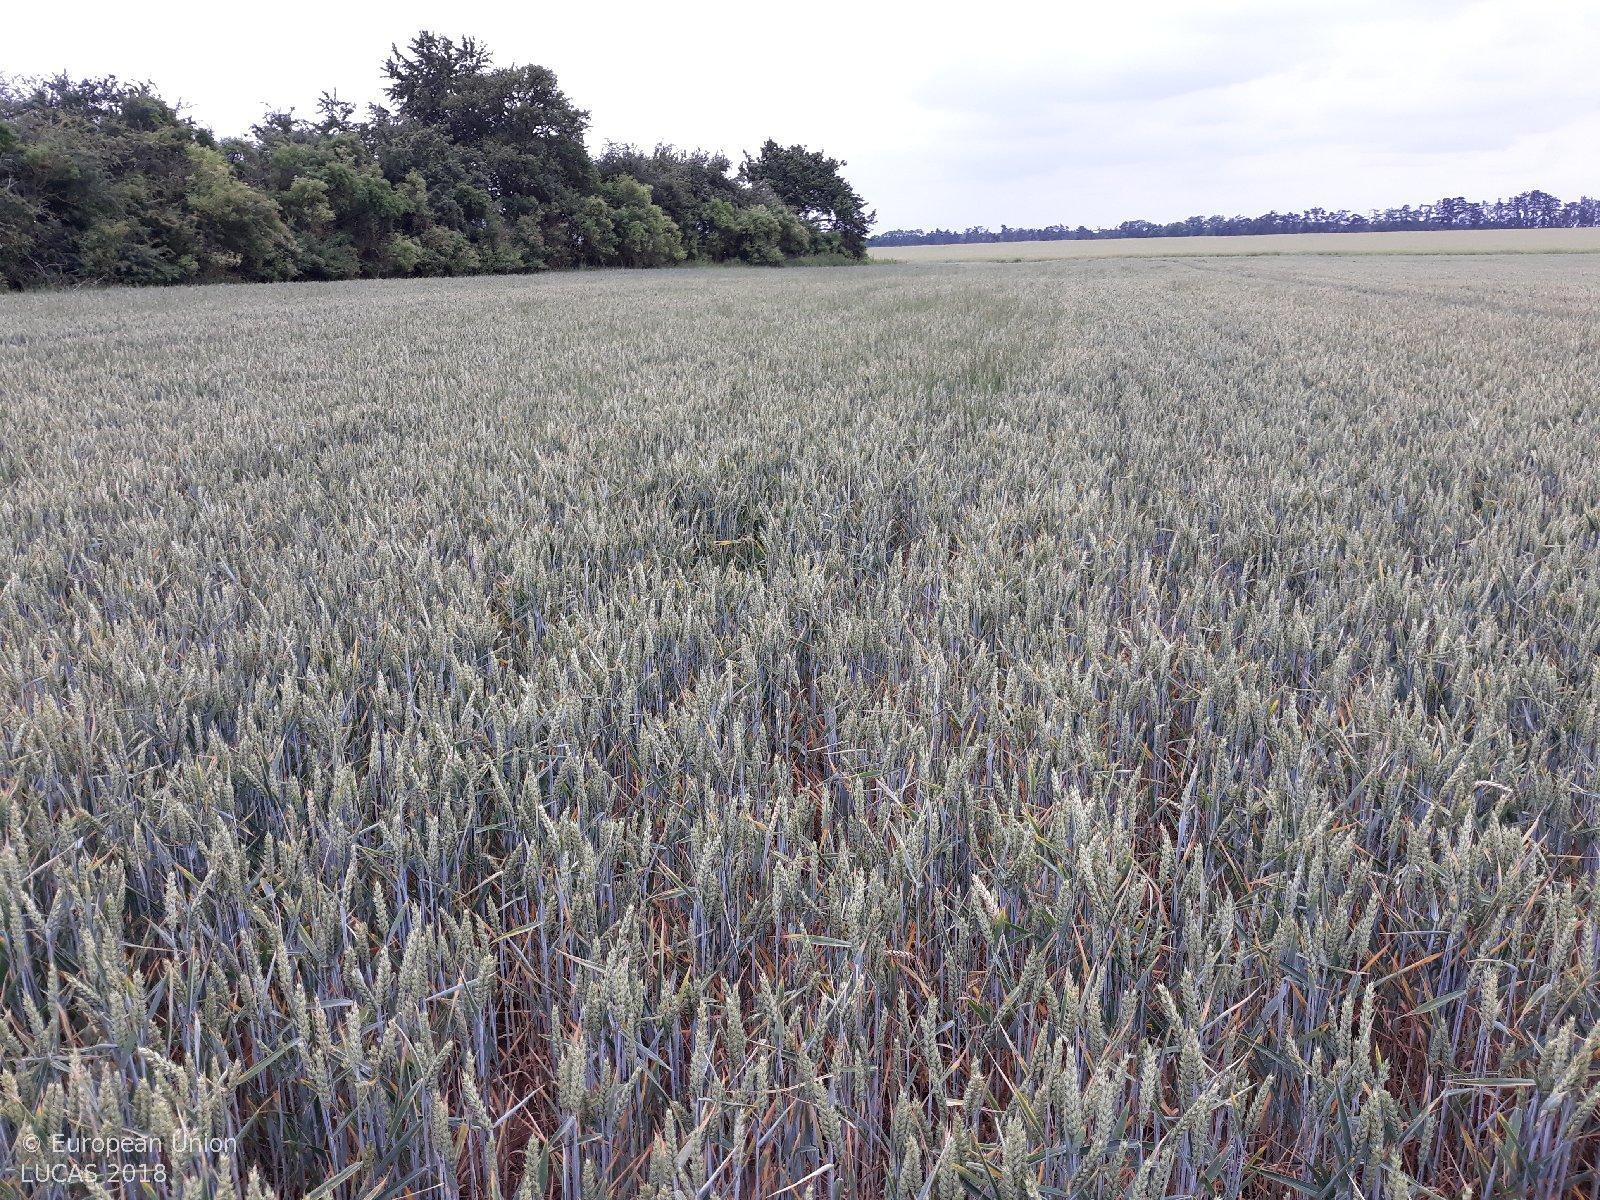

In [16]:
import requests
from IPython.display import Image

r = requests.get(images["S"])
Image(r.content)